In [5]:
# Instala a biblioteca yfinance
!pip install yfinance --upgrade

In [6]:
# Instala a biblioteca mplfinance
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 4.1 MB/s eta 0:00:00


In [7]:
#Importando bibliotecas que podem ser utilizadas
import yfinance as yf
import mplfinance as mpf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Definindo uma lista de tickers de ações
ativos = ['ALOS3.SA', 'ALPA4.SA', 'ABEV3.SA', 'ASAI3.SA', 'AURE3.SA', 'AZUL4.SA', 'AZZA3.SA', 'B3SA3.SA', 'BBSE3.SA', 'BBDC3.SA', 'BBDC4.SA', 'BRAP4.SA', 'BBAS3.SA', 'BRKM5.SA', 'BRAV3.SA', 'BRFS3.SA', 'BPAC11.SA', 'CXSE3.SA', 'CRFB3.SA', 'CCRO3.SA', 'CMIG4.SA', 'COGN3.SA', 'CPLE6.SA', 'CSAN3.SA', 'CPFE3.SA', 'CMIN3.SA', 'CVCB3.SA', 'CYRE3.SA', 'ELET3.SA', 'ELET6.SA', 'EMBR3.SA', 'ENGI11.SA', 'ENEV3.SA', 'EGIE3.SA', 'EQTL3.SA', 'EZTC3.SA', 'FLRY3.SA', 'GGBR4.SA', 'GOAU4.SA', 'NTCO3.SA', 'HAPV3.SA', 'HYPE3.SA', 'IGTI11.SA', 'IRBR3.SA', 'ITSA4.SA', 'ITUB4.SA', 'JBSS3.SA', 'KLBN11.SA', 'RENT3.SA', 'LREN3.SA', 'LWSA3.SA', 'MGLU3.SA', 'MRFG3.SA', 'BEEF3.SA', 'MRVE3.SA', 'MULT3.SA', 'PCAR3.SA', 'PETR3.SA', 'PETR4.SA', 'RECV3.SA', 'PRIO3.SA', 'PETZ3.SA', 'RADL3.SA', 'RAIZ4.SA', 'RDOR3.SA', 'RAIL3.SA', 'SBSP3.SA', 'SANB11.SA', 'STBP3.SA', 'SMTO3.SA', 'CSNA3.SA', 'SLCE3.SA', 'SUZB3.SA', 'TAEE11.SA', 'VIVT3.SA', 'TIMS3.SA', 'TOTS3.SA', 'TRPL4.SA','UGPA3.SA', 'USIM5.SA', 'VALE3.SA', 'VAMO3.SA', 'VBBR3.SA', 'VIVA3.SA', 'WEGE3.SA', 'YDUQ3.SA']

# Obtendo os dados do yfinance
dados = yf.download(ativos, start='2023-01-09', end=pd.Timestamp.today())

# Transformando os dados para que cada ativo apareça em uma linha separada
dados_reset = dados.stack(level=1).reset_index()

# Exibindo os primeiros dados
dados_reset.head()


[*********************100%***********************]  86 of 86 completed
<ipython-input-8-94e1ca728d8f>:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  dados_reset = dados.stack(level=1).reset_index()


Price,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2023-01-09 00:00:00+00:00,ABEV3.SA,13.684702,14.40,14.470000,14.270000,14.290000,24448600.0
1,2023-01-09 00:00:00+00:00,ALPA4.SA,14.220000,14.22,14.610000,13.610000,13.950000,3030700.0
2,2023-01-09 00:00:00+00:00,ASAI3.SA,19.151798,19.23,19.450001,18.860001,18.950001,4878500.0
3,2023-01-09 00:00:00+00:00,AURE3.SA,11.307482,14.34,14.600000,14.270000,14.510000,1567200.0
4,2023-01-09 00:00:00+00:00,AZUL4.SA,12.000000,12.00,12.200000,11.310000,11.520000,11393100.0


In [9]:
#salvar csv
dados_reset.to_csv('dados_reset.csv', index=True)

In [10]:
# Converte o índice do DataFrame e armazena o resultado em uma nova coluna
dados['data'] = pd.to_datetime(dados.index)

# Remover a parte de tempo, mantendo apenas a data
dados['data'] = dados['data'].dt.date
# Usar a nova variável (data coluna) e atualizar indice
dados.index = dados['data']

dados.head()

<ipython-input-10-cce4737ee95c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dados['data'] = pd.to_datetime(dados.index)


Price       Adj Close                                                   \
Ticker       ABEV3.SA ALOS3.SA ALPA4.SA   ASAI3.SA   AURE3.SA AZUL4.SA   
data                                                                     
2023-01-09  13.684702      NaN    14.22  19.151798  11.307482    12.00   
2023-01-10  13.817748      NaN    14.78  19.161758  11.189202    12.34   
2023-01-11  13.580167      NaN    15.13  19.679644  11.575581    12.35   
2023-01-12  13.399605      NaN    14.51  19.918669  11.875220    12.32   
2023-01-13  13.190533      NaN    13.62  19.878830  11.662319    11.66   

Price                                                   ...   Volume  \
Ticker       AZZA3.SA   B3SA3.SA   BBAS3.SA   BBDC3.SA  ... UGPA3.SA   
data                                                    ...            
2023-01-09  72.129257  11.607094  15.379965  11.507261  ...  3907200   
2023-01-10  74.090393  12.018296  15.641393  11.747737  ...  4617400   
2023-01-11  75.945770  12.569680  15.862942  11.872430  ...  6669800   
2023-01-12  76.522575  12.494917  15.761030  11.631951  ...  4672600   
2023-01-13  75.705437  12.298661  15.796480  11.676487  ...  4497600   

Price                                                                         \
Ticker      USIM5.SA  VALE3.SA VAMO3.SA  VBBR3.SA VIVA3.SA VIVT3.SA WEGE3.SA   
data                                                                           
2023-01-09  10693500  19285800  3368460   7659800   696300  2607700  5730600   
2023-01-10  13821300  19821100  3522522  10949600  1693000  3302800  6556000   
2023-01-11  13903300  23834100  4034277  14919900   717700  4127600  5982900   
2023-01-12  11679900  18058600  3324846  11711500   963600  3618900  5376000   
2023-01-13   7269200  16905800  2088011   9014400   852500  3417300  4957200   

Price                      data  
Ticker     YDUQ3.SA              
data                             
2023-01-09  4058600  2023-01-09  
2023-01-10  6683900  2023-01-10  
2023-01-11  6467200  2023-01-11  
2023-01-12  5377000  2023-01-12  
2023-01-13  5201000  2023-01-13  

[5 rows x 517 columns]

In [11]:
#visualizando a planilha geral
dados

Price       Adj Close                                                     \
Ticker       ABEV3.SA   ALOS3.SA ALPA4.SA   ASAI3.SA   AURE3.SA AZUL4.SA   
data                                                                       
2023-01-09  13.684702        NaN    14.22  19.151798  11.307482    12.00   
2023-01-10  13.817748        NaN    14.78  19.161758  11.189202    12.34   
2023-01-11  13.580167        NaN    15.13  19.679644  11.575581    12.35   
2023-01-12  13.399605        NaN    14.51  19.918669  11.875220    12.32   
2023-01-13  13.190533        NaN    13.62  19.878830  11.662319    11.66   
...               ...        ...      ...        ...        ...      ...   
2024-10-04  13.280000  22.404888     7.05   6.970000  10.340000     5.88   
2024-10-07  13.170000  22.629999     7.01   6.770000  10.240000     5.75   
2024-10-08  13.080000  22.590000     7.02   6.820000  10.220000     6.18   
2024-10-09  13.080000  22.010000     6.83   6.500000  10.090000     6.18   
2024-10-10  13.110000  22.170000     6.95   6.650000  10.120000     5.81   

Price                                                   ...   Volume  \
Ticker       AZZA3.SA   B3SA3.SA   BBAS3.SA   BBDC3.SA  ... UGPA3.SA   
data                                                    ...            
2023-01-09  72.129257  11.607094  15.379965  11.507261  ...  3907200   
2023-01-10  74.090393  12.018296  15.641393  11.747737  ...  4617400   
2023-01-11  75.945770  12.569680  15.862942  11.872430  ...  6669800   
2023-01-12  76.522575  12.494917  15.761030  11.631951  ...  4672600   
2023-01-13  75.705437  12.298661  15.796480  11.676487  ...  4497600   
...               ...        ...        ...        ...  ...      ...   
2024-10-04  41.529999  10.750000  26.860001  13.290000  ...  3580800   
2024-10-07  40.900002  10.550000  26.990000  13.300000  ...  3455300   
2024-10-08  41.830002  10.700000  26.980000  13.370000  ...  3565200   
2024-10-09  41.349998  10.680000  26.430000  13.060000  ...  4018100   
2024-10-10  41.349998  10.750000  26.200001  13.170000  ...        0   

Price                                                                          \
Ticker      USIM5.SA  VALE3.SA  VAMO3.SA  VBBR3.SA VIVA3.SA VIVT3.SA WEGE3.SA   
data                                                                            
2023-01-09  10693500  19285800   3368460   7659800   696300  2607700  5730600   
2023-01-10  13821300  19821100   3522522  10949600  1693000  3302800  6556000   
2023-01-11  13903300  23834100   4034277  14919900   717700  4127600  5982900   
2023-01-12  11679900  18058600   3324846  11711500   963600  3618900  5376000   
2023-01-13   7269200  16905800   2088011   9014400   852500  3417300  4957200   
...              ...       ...       ...       ...      ...      ...      ...   
2024-10-04  12257700  16268300  16914600   8186800  1448100  2425400  4819200   
2024-10-07   8533300  22467400  12526200   7201200  1488000  1928900  5409300   
2024-10-08  21941200  38028100  10046800   8181700  1672500  2170200  6798000   
2024-10-09  30687900  22758400  10710700   6007200  5111800  1575600  5806100   
2024-10-10         0         0         0         0        0        0        0   

Price                      data  
Ticker     YDUQ3.SA              
data                             
2023-01-09  4058600  2023-01-09  
2023-01-10  6683900  2023-01-10  
2023-01-11  6467200  2023-01-11  
2023-01-12  5377000  2023-01-12  
2023-01-13  5201000  2023-01-13  
...             ...         ...  
2024-10-04  8222100  2024-10-04  
2024-10-07  8825000  2024-10-07  
2024-10-08  9180000  2024-10-08  
2024-10-09  5492100  2024-10-09  
2024-10-10        0  2024-10-10  

[441 rows x 517 columns]

In [12]:
#Criar arquivo csv com dados baixados
#dados.to_csv('dados.csv', index=True)
dados.to_csv('dados_teste.csv', index=True, sep=',')

#salva csv no drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
#visualizando o tipo de dados do df
print(dados.dtypes)

Price      Ticker  
Adj Close  ABEV3.SA    float64
           ALOS3.SA    float64
           ALPA4.SA    float64
           ASAI3.SA    float64
           AURE3.SA    float64
                        ...   
Volume     VIVA3.SA      int64
           VIVT3.SA      int64
           WEGE3.SA      int64
           YDUQ3.SA      int64
data                    object
Length: 517, dtype: object


In [14]:
# Mostra informações sobre o DataFrame, incluindo o número de entradas e tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 441 entries, 2023-01-09 to 2024-10-10
Columns: 517 entries, ('Adj Close', 'ABEV3.SA') to ('data', '')
dtypes: float64(432), int64(84), object(1)
memory usage: 1.7+ MB


In [15]:
# Análise descritiva das colunas numéricas
dados[['Low', 'Close']].describe()

Price          Low                                                  \
Ticker    ABEV3.SA    ALOS3.SA    ALPA4.SA    ASAI3.SA    AURE3.SA   
count   441.000000  246.000000  441.000000  441.000000  441.000000   
mean     13.164717   22.954228    8.978163   12.824830   13.145828   
std       1.218794    1.567616    1.410343    2.701337    1.421537   
min       0.000000   19.900000    0.000000    0.000000    0.000000   
25%      12.440000   21.610000    8.170000   11.230000   12.020000   
50%      13.130000   22.950000    8.990000   12.850000   13.420000   
75%      14.080000   24.167500    9.440000   13.670000   14.160000   
max      15.440000   26.450001   14.710000   20.850000   15.680000   

Price                                                               ...  \
Ticker    AZUL4.SA    AZZA3.SA    B3SA3.SA    BBAS3.SA    BBDC3.SA  ...   
count   441.000000  441.000000  441.000000  441.000000  441.000000  ...   
mean     12.045692   62.083333   12.212268   24.781372   12.817642  ...   
std       3.854928   11.626433    1.412322    3.357907    1.250317  ...   
min       0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%       9.260000   52.180000   11.130000   23.150000   12.060000  ...   
50%      12.050000   60.470001   12.180000   25.400000   12.690000  ...   
75%      14.420000   71.940002   13.130000   27.379999   13.670000  ...   
max      21.559999   87.589996   14.890000   29.530001   15.550000  ...   

Price        Close                                                  \
Ticker    TRPL4.SA    UGPA3.SA    USIM5.SA    VALE3.SA    VAMO3.SA   
count   441.000000  441.000000  441.000000  441.000000  441.000000   
mean     24.530249   21.137551    7.675873   68.847347   10.048693   
std       1.484690    4.991593    1.235118    9.102558    2.338460   
min      21.190001   12.300000    5.600000   56.000000    5.510000   
25%      23.820000   18.000000    6.860000   62.330002    8.170000   
50%      24.809999   21.490000    7.390000   66.750000    9.280000   
75%      25.379999   25.100000    8.280000   72.230003   12.000000   
max      27.750000   31.080000   11.110000   98.000000   14.619954   

Price                                                               
Ticker    VBBR3.SA    VIVA3.SA    VIVT3.SA    WEGE3.SA    YDUQ3.SA  
count   441.000000  441.000000  441.000000  441.000000  441.000000  
mean     20.262336   26.310091   46.407642   39.590816   15.068594  
std       3.835955    4.060386    5.277623    5.684982    5.148806  
min      12.330000   19.830000   38.099998   31.469999    6.550000  
25%      17.120001   22.590000   41.689999   36.150002   10.250000  
50%      20.920000   26.500000   45.500000   38.230000   15.320000  
75%      23.389999   28.709999   51.200001   40.110001   20.000000  
max      26.600000   35.610001   56.459999   56.049999   24.000000  

[8 rows x 172 columns]

In [16]:
#Criar colunas 'ano', 'mes' e 'dia' a partir da coluna 'date'
dados['date'] = pd.to_datetime(dados['data'])

dados['ano'] = dados['date'].dt.year
dados['mes'] = dados['date'].dt.month
dados['dia'] = dados['date'].dt.day

dados

<ipython-input-16-1d3b458d7c89>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dados['date'] = pd.to_datetime(dados['data'])
<ipython-input-16-1d3b458d7c89>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dados['ano'] = dados['date'].dt.year
<ipython-input-16-1d3b458d7c89>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne

Price       Adj Close                                                     \
Ticker       ABEV3.SA   ALOS3.SA ALPA4.SA   ASAI3.SA   AURE3.SA AZUL4.SA   
data                                                                       
2023-01-09  13.684702        NaN    14.22  19.151798  11.307482    12.00   
2023-01-10  13.817748        NaN    14.78  19.161758  11.189202    12.34   
2023-01-11  13.580167        NaN    15.13  19.679644  11.575581    12.35   
2023-01-12  13.399605        NaN    14.51  19.918669  11.875220    12.32   
2023-01-13  13.190533        NaN    13.62  19.878830  11.662319    11.66   
...               ...        ...      ...        ...        ...      ...   
2024-10-04  13.280000  22.404888     7.05   6.970000  10.340000     5.88   
2024-10-07  13.170000  22.629999     7.01   6.770000  10.240000     5.75   
2024-10-08  13.080000  22.590000     7.02   6.820000  10.220000     6.18   
2024-10-09  13.080000  22.010000     6.83   6.500000  10.090000     6.18   
2024-10-10  13.110000  22.170000     6.95   6.650000  10.120000     5.81   

Price                                                   ...    Volume  \
Ticker       AZZA3.SA   B3SA3.SA   BBAS3.SA   BBDC3.SA  ...  VBBR3.SA   
data                                                    ...             
2023-01-09  72.129257  11.607094  15.379965  11.507261  ...   7659800   
2023-01-10  74.090393  12.018296  15.641393  11.747737  ...  10949600   
2023-01-11  75.945770  12.569680  15.862942  11.872430  ...  14919900   
2023-01-12  76.522575  12.494917  15.761030  11.631951  ...  11711500   
2023-01-13  75.705437  12.298661  15.796480  11.676487  ...   9014400   
...               ...        ...        ...        ...  ...       ...   
2024-10-04  41.529999  10.750000  26.860001  13.290000  ...   8186800   
2024-10-07  40.900002  10.550000  26.990000  13.300000  ...   7201200   
2024-10-08  41.830002  10.700000  26.980000  13.370000  ...   8181700   
2024-10-09  41.349998  10.680000  26.430000  13.060000  ...   6007200   
2024-10-10  41.349998  10.750000  26.200001  13.170000  ...         0   

Price                                                 data       date   ano  \
Ticker     VIVA3.SA VIVT3.SA WEGE3.SA YDUQ3.SA                                
data                                                                          
2023-01-09   696300  2607700  5730600  4058600  2023-01-09 2023-01-09  2023   
2023-01-10  1693000  3302800  6556000  6683900  2023-01-10 2023-01-10  2023   
2023-01-11   717700  4127600  5982900  6467200  2023-01-11 2023-01-11  2023   
2023-01-12   963600  3618900  5376000  5377000  2023-01-12 2023-01-12  2023   
2023-01-13   852500  3417300  4957200  5201000  2023-01-13 2023-01-13  2023   
...             ...      ...      ...      ...         ...        ...   ...   
2024-10-04  1448100  2425400  4819200  8222100  2024-10-04 2024-10-04  2024   
2024-10-07  1488000  1928900  5409300  8825000  2024-10-07 2024-10-07  2024   
2024-10-08  1672500  2170200  6798000  9180000  2024-10-08 2024-10-08  2024   
2024-10-09  5111800  1575600  5806100  5492100  2024-10-09 2024-10-09  2024   
2024-10-10        0        0        0        0  2024-10-10 2024-10-10  2024   

Price      mes dia  
Ticker              
data                
2023-01-09   1   9  
2023-01-10   1  10  
2023-01-11   1  11  
2023-01-12   1  12  
2023-01-13   1  13  
...         ..  ..  
2024-10-04  10   4  
2024-10-07  10   7  
2024-10-08  10   8  
2024-10-09  10   9  
2024-10-10  10  10  

[441 rows x 521 columns]

In [17]:
#ocultar indice
dados = dados.reset_index(drop=True)

In [18]:
#visualizar tabela
dados

Price   Adj Close                                                     \
Ticker   ABEV3.SA   ALOS3.SA ALPA4.SA   ASAI3.SA   AURE3.SA AZUL4.SA   
0       13.684702        NaN    14.22  19.151798  11.307482    12.00   
1       13.817748        NaN    14.78  19.161758  11.189202    12.34   
2       13.580167        NaN    15.13  19.679644  11.575581    12.35   
3       13.399605        NaN    14.51  19.918669  11.875220    12.32   
4       13.190533        NaN    13.62  19.878830  11.662319    11.66   
..            ...        ...      ...        ...        ...      ...   
436     13.280000  22.404888     7.05   6.970000  10.340000     5.88   
437     13.170000  22.629999     7.01   6.770000  10.240000     5.75   
438     13.080000  22.590000     7.02   6.820000  10.220000     6.18   
439     13.080000  22.010000     6.83   6.500000  10.090000     6.18   
440     13.110000  22.170000     6.95   6.650000  10.120000     5.81   

Price                                               ...    Volume           \
Ticker   AZZA3.SA   B3SA3.SA   BBAS3.SA   BBDC3.SA  ...  VBBR3.SA VIVA3.SA   
0       72.129257  11.607094  15.379965  11.507261  ...   7659800   696300   
1       74.090393  12.018296  15.641393  11.747737  ...  10949600  1693000   
2       75.945770  12.569680  15.862942  11.872430  ...  14919900   717700   
3       76.522575  12.494917  15.761030  11.631951  ...  11711500   963600   
4       75.705437  12.298661  15.796480  11.676487  ...   9014400   852500   
..            ...        ...        ...        ...  ...       ...      ...   
436     41.529999  10.750000  26.860001  13.290000  ...   8186800  1448100   
437     40.900002  10.550000  26.990000  13.300000  ...   7201200  1488000   
438     41.830002  10.700000  26.980000  13.370000  ...   8181700  1672500   
439     41.349998  10.680000  26.430000  13.060000  ...   6007200  5111800   
440     41.349998  10.750000  26.200001  13.170000  ...         0        0   

Price                                    data       date   ano mes dia  
Ticker VIVT3.SA WEGE3.SA YDUQ3.SA                                       
0       2607700  5730600  4058600  2023-01-09 2023-01-09  2023   1   9  
1       3302800  6556000  6683900  2023-01-10 2023-01-10  2023   1  10  
2       4127600  5982900  6467200  2023-01-11 2023-01-11  2023   1  11  
3       3618900  5376000  5377000  2023-01-12 2023-01-12  2023   1  12  
4       3417300  4957200  5201000  2023-01-13 2023-01-13  2023   1  13  
..          ...      ...      ...         ...        ...   ...  ..  ..  
436     2425400  4819200  8222100  2024-10-04 2024-10-04  2024  10   4  
437     1928900  5409300  8825000  2024-10-07 2024-10-07  2024  10   7  
438     2170200  6798000  9180000  2024-10-08 2024-10-08  2024  10   8  
439     1575600  5806100  5492100  2024-10-09 2024-10-09  2024  10   9  
440           0        0        0  2024-10-10 2024-10-10  2024  10  10  

[441 rows x 521 columns]

In [19]:
#visualizar colunas e tipo
print(dados.dtypes)

Price      Ticker  
Adj Close  ABEV3.SA           float64
           ALOS3.SA           float64
           ALPA4.SA           float64
           ASAI3.SA           float64
           AURE3.SA           float64
                            ...      
data                           object
date                   datetime64[ns]
ano                             int32
mes                             int32
dia                             int32
Length: 521, dtype: object


In [20]:
#descrição da tabela
dados.describe()

Price    Adj Close                                                  \
Ticker    ABEV3.SA    ALOS3.SA    ALPA4.SA    ASAI3.SA    AURE3.SA   
count   441.000000  246.000000  441.000000  441.000000  441.000000   
mean     12.947035   22.449553    9.177097   13.050135   12.044506   
min      11.090000   19.356661    6.830000    6.500000   10.090000   
25%      12.380000   21.570929    8.320000   11.520000   11.756942   
50%      12.950000   22.589525    9.150000   13.020000   12.061977   
75%      13.618179   23.231004    9.630000   13.980000   12.410589   
max      14.777578   25.293707   15.130000   21.024155   13.247258   
std       0.828974    1.181310    1.375687    2.674175    0.542813   

Price                                                               ...  \
Ticker    AZUL4.SA    AZZA3.SA    B3SA3.SA    BBAS3.SA    BBDC3.SA  ...   
count   441.000000  441.000000  441.000000  441.000000  441.000000  ...   
mean     12.361247   61.809334   11.973095   23.671521   12.067061  ...   
min       4.040000   40.540001    9.743159   15.379965   10.039745  ...   
25%       9.550000   52.585594   10.939609   21.717203   11.204440  ...   
50%      12.360000   60.429764   12.022930   24.417740   11.889301  ...   
75%      14.690000   70.917969   12.796729   26.533062   13.004887  ...   
max      21.860001   85.222694   14.424599   29.059889   14.397868  ...   
std       3.900998   10.571075    1.190660    3.516773    1.058841  ...   

Price         Volume                                                          \
Ticker      VAMO3.SA      VBBR3.SA      VIVA3.SA      VIVT3.SA      WEGE3.SA   
count   4.410000e+02  4.410000e+02  4.410000e+02  4.410000e+02  4.410000e+02   
mean    7.152371e+06  9.696548e+06  2.787556e+06  2.348540e+06  6.892910e+06   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     4.182300e+06  6.131600e+06  1.495400e+06  1.668200e+06  4.730200e+06   
50%     6.011500e+06  8.186800e+06  2.122300e+06  2.131800e+06  5.979700e+06   
75%     8.336300e+06  1.124180e+07  3.173700e+06  2.744300e+06  7.934900e+06   
max     6.244440e+07  4.632970e+07  3.859080e+07  1.766530e+07  4.312870e+07   
std     5.416492e+06  5.803682e+06  3.032877e+06  1.267073e+06  4.033877e+06   

Price                                          date          ano         mes  \
Ticker      YDUQ3.SA                                                           
count   4.410000e+02                            441   441.000000  441.000000   
mean    4.866005e+06  2023-11-26 15:04:29.387755008  2023.448980    5.981859   
min     0.000000e+00            2023-01-09 00:00:00  2023.000000    1.000000   
25%     3.239300e+06            2023-06-20 00:00:00  2023.000000    3.000000   
50%     4.254300e+06            2023-11-27 00:00:00  2023.000000    6.000000   
75%     5.733400e+06            2024-05-08 00:00:00  2024.000000    8.000000   
max     2.028200e+07            2024-10-10 00:00:00  2024.000000   12.000000   
std     2.665747e+06                            NaN     0.497955    3.161507   

Price          dia  
Ticker              
count   441.000000  
mean     15.725624  
min       1.000000  
25%       8.000000  
50%      16.000000  
75%      23.000000  
max      31.000000  
std       8.745622  

[8 rows x 520 columns]

In [21]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Columns: 521 entries, ('Adj Close', 'ABEV3.SA') to ('dia', '')
dtypes: datetime64[ns](1), float64(432), int32(3), int64(84), object(1)
memory usage: 1.7+ MB


#Pergunta 1


---


## Quais são as principais tendências do Ibovespa ao longo do último ano?
- Justificativa: Segundo a teoria de Dow, o mercado apresenta tendências primárias, secundárias e terciárias. Identificar essas tendências é essencial para entender a direção geral do mercado e tomar decisões de investimento.
- Análise:
 *  Visualize a evolução do índice ao longo do tempo
 *  Utilize médias móveis (como a de 50 e 200 dias) para suavizar os dados e destacar as tendências de longo prazo.
 *   Analise as mudanças nos preços, observando períodos de alta (bull market) e baixa (bear market)










In [35]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


[*********************100%***********************]  1 of 1 completed


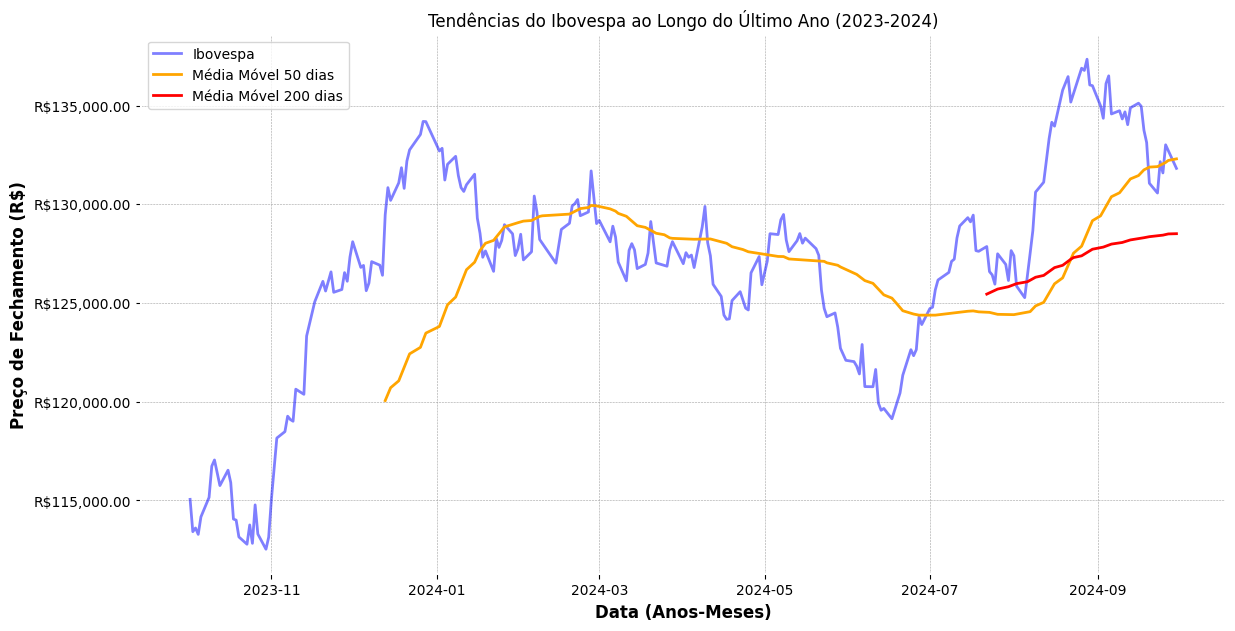

In [36]:
# Definindo o ticker do Ibovespa e o período de um ano
ticker = "^BVSP"  # Ticker do Ibovespa
start_date = "2023-10-01"  # Data de início (um ano atrás)
end_date = "2024-10-01"    # Data de fim

# Coletando os dados do Ibovespa
ibovespa_data = yf.download(ticker, start=start_date, end=end_date)

# Calculando as médias móveis de 50 e 200 dias
ibovespa_data['MA50'] = ibovespa_data['Close'].rolling(window=50).mean()
ibovespa_data['MA200'] = ibovespa_data['Close'].rolling(window=200).mean()

# Plotando os dados
plt.figure(figsize=(14, 7))
plt.plot(ibovespa_data['Close'], label='Ibovespa', color='blue', alpha=0.5)
plt.plot(ibovespa_data['MA50'], label='Média Móvel 50 dias', color='orange')
plt.plot(ibovespa_data['MA200'], label='Média Móvel 200 dias', color='red')

# Personalizando o eixo Y para exibir Reais (R$)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('R${x:,.2f}'))

# Personalizando o gráfico
plt.title('Tendências do Ibovespa ao Longo do Último Ano (2023-2024)')
plt.xlabel('Data (Anos-Meses)')
plt.ylabel('Preço de Fechamento (R$)')
plt.legend()
plt.show()

#Pergunta 2


---


## Há evidências de reversões de tendência nos últimos meses?
- Justificativa: A teoria de Dow enfatiza a importância de identificar reversões, pois elas podem representar pontos críticos para decisões de compra e venda. Reconhecer padrões de reversão é fundamental para os investidores.
- Análise:
  * Observe formações que indiquem reversões, como "topos e fundos duplos" ou "ombro-cabeça-ombro".
  * Calcule o Índice de Força Relativa (RSI) para identificar condições de sobrecompra ou sobrevenda, o que pode indicar uma possível reversão de tendência.




[*********************100%***********************]  1 of 1 completed


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=86557fc1dce0fe92006a674edcae4f16787743ae91c9df953bbe006e2c2bed7b
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


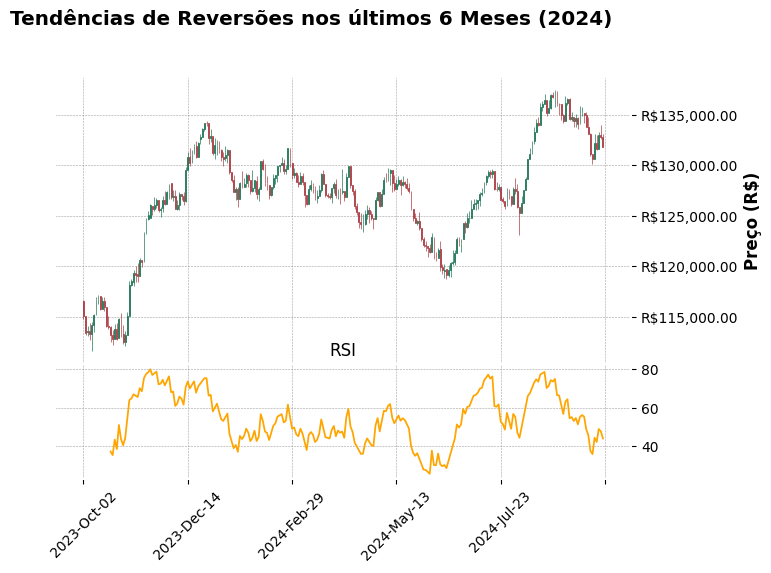

In [40]:
# Definindo o ticker do Ibovespa e o período de um ano
ticker = "^BVSP"  # Ticker do Ibovespa
start_date = "2023-10-01"  # Data de início (um ano atrás)
end_date = "2024-10-01"    # Data de fim

# Coletando os dados do Ibovespa
ibovespa_data = yf.download(ticker, start=start_date, end=end_date)

# Calculando as médias móveis de 50 e 200 dias
ibovespa_data['MA50'] = ibovespa_data['Close'].rolling(window=50).mean()
ibovespa_data['MA200'] = ibovespa_data['Close'].rolling(window=200).mean()

# Instala e importa a biblioteca necessária para calcular o RSI
!pip install ta
from ta.momentum import RSIIndicator

# Calcula o RSI e adiciona ao DataFrame
rsi_indicator = RSIIndicator(close=ibovespa_data["Close"])
ibovespa_data['RSI'] = rsi_indicator.rsi()

# Plotando dados do Ibovespa com tipo candlestick
fig, ax = mpf.plot(
    ibovespa_data,
    type='candle',
    style='charles',
    title='Tendências de Reversões nos últimos 6 Meses (2024)',
    ylabel='Preço (R$)',
    volume=False,
    addplot=[
        mpf.make_addplot(
            ibovespa_data['RSI'],
            panel=1,
            color='orange',
            title='RSI'
        )
    ],
    returnfig=True
)

# Personalizando o eixo Y para exibir Reais (R$)
ax[0].yaxis.set_major_formatter(mticker.StrMethodFormatter('R${x:,.2f}'))

plt.show()



[*********************100%***********************]  1 of 1 completed


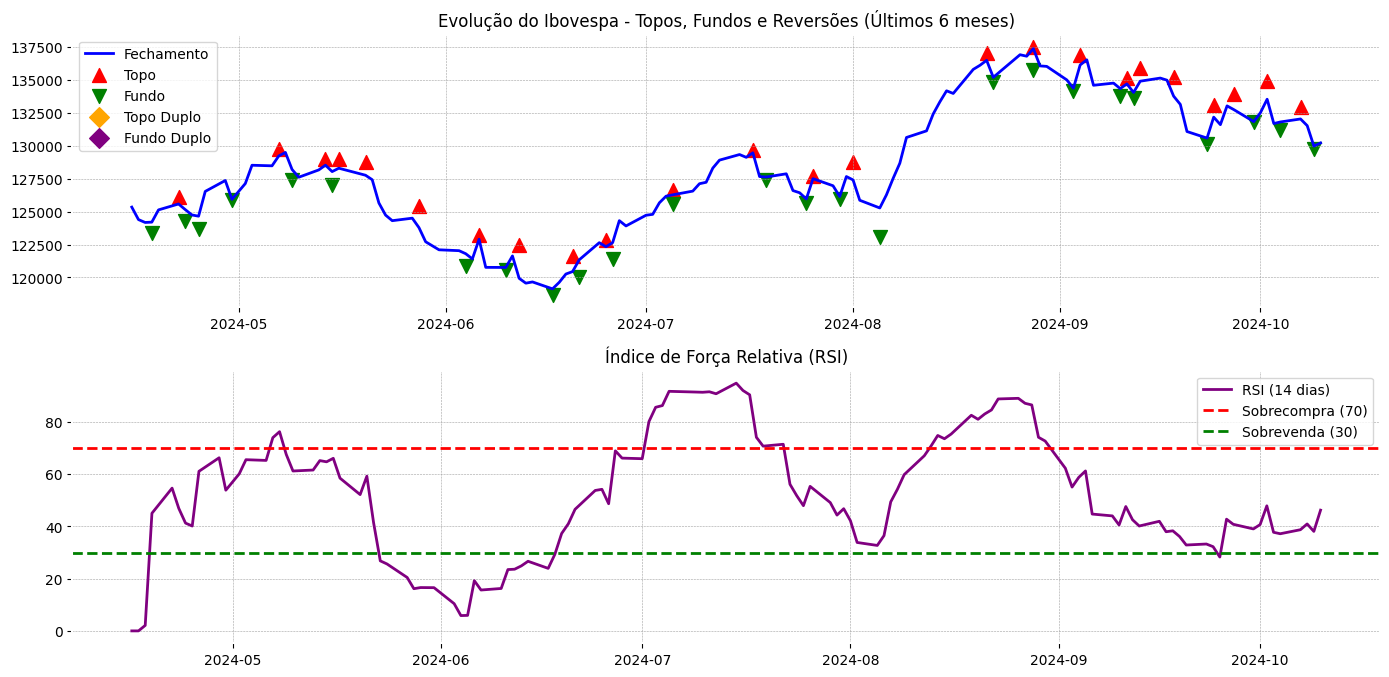

In [ ]:
#outra forma
from datetime import datetime, timedelta

# 1. Definir intervalo de 6 meses a partir da data atual
end_date = datetime.today()
start_date = end_date - timedelta(days=6*30)  # Aproximadamente 6 meses

# 2. Baixar dados do Ibovespa
ticker = "^BVSP"
ibovespa_data = yf.download(ticker, start=start_date, end=end_date)

# 3. Calcular o RSI (Índice de Força Relativa)
def calculate_RSI(data, window=14):
    delta = data['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

# Calcular o RSI com janela de 14 dias
ibovespa_data['RSI'] = calculate_RSI(ibovespa_data)

# 4. Identificar topos e fundos simples
ibovespa_data['High_Peak'] = (ibovespa_data['High'] > ibovespa_data['High'].shift(1)) & (ibovespa_data['High'] > ibovespa_data['High'].shift(-1))
ibovespa_data['Low_Trough'] = (ibovespa_data['Low'] < ibovespa_data['Low'].shift(1)) & (ibovespa_data['Low'] < ibovespa_data['Low'].shift(-1))

# 5. Detectar padrões de reversão (Topos e Fundos Duplos / Ombro-Cabeça-Ombro)
# Detectando potenciais topos duplos e fundos duplos
ibovespa_data['Double_Top'] = (ibovespa_data['High_Peak'].shift(1)) & (ibovespa_data['High_Peak'])
ibovespa_data['Double_Bottom'] = (ibovespa_data['Low_Trough'].shift(1)) & (ibovespa_data['Low_Trough'])

# 6. Plotar o preço de fechamento, RSI e possíveis topos/fundos
plt.figure(figsize=(14, 10))

# Preço de fechamento com topos e fundos
plt.subplot(3, 1, 1)
plt.plot(ibovespa_data['Close'], label='Fechamento', color='blue')
plt.scatter(ibovespa_data.index[ibovespa_data['High_Peak']], ibovespa_data['High'][ibovespa_data['High_Peak']], color='red', label='Topo', marker='^', s=100)
plt.scatter(ibovespa_data.index[ibovespa_data['Low_Trough']], ibovespa_data['Low'][ibovespa_data['Low_Trough']], color='green', label='Fundo', marker='v', s=100)
plt.scatter(ibovespa_data.index[ibovespa_data['Double_Top']], ibovespa_data['High'][ibovespa_data['Double_Top']], color='orange', label='Topo Duplo', marker='D', s=100)
plt.scatter(ibovespa_data.index[ibovespa_data['Double_Bottom']], ibovespa_data['Low'][ibovespa_data['Double_Bottom']], color='purple', label='Fundo Duplo', marker='D', s=100)
plt.title('Evolução do Ibovespa - Topos, Fundos e Reversões (Últimos 6 meses)')
plt.legend()
plt.grid(True)

# Plotar RSI
plt.subplot(3, 1, 2)
plt.plot(ibovespa_data['RSI'], label='RSI (14 dias)', color='purple')
plt.axhline(70, linestyle='--', color='red', label='Sobrecompra (70)')
plt.axhline(30, linestyle='--', color='green', label='Sobrevenda (30)')
plt.title('Índice de Força Relativa (RSI)')
plt.legend()
plt.grid(True)

# 7. Verificar reversões com RSI e padrões de topos e fundos
reversals = ibovespa_data[(ibovespa_data['RSI'] > 70) | (ibovespa_data['RSI'] < 30) | ibovespa_data['Double_Top'] | ibovespa_data['Double_Bottom']]

# 8. Exibir evidências de reversões
#print("Evidências de possíveis reversões nos últimos 6 meses:")
#print(reversals[['Close', 'RSI', 'Double_Top', 'Double_Bottom']])

plt.tight_layout()
plt.show()

#Pergunta 3
## Como o volume de negociação de ações ao longo do tempo influencia o desempenho de preço de uma ação?
   - Justificativa: O volume de negociação pode ser um indicador da liquidez e interesse do mercado por determinadas ações, o que pode influenciar seus preços.
   - Análise:
     - Verificar a correlação entre volume de negociação e o preço das ações.
     - Identificar padrões nos dados históricos que explicam essa relação.



[*********************100%***********************]  1 of 1 completed


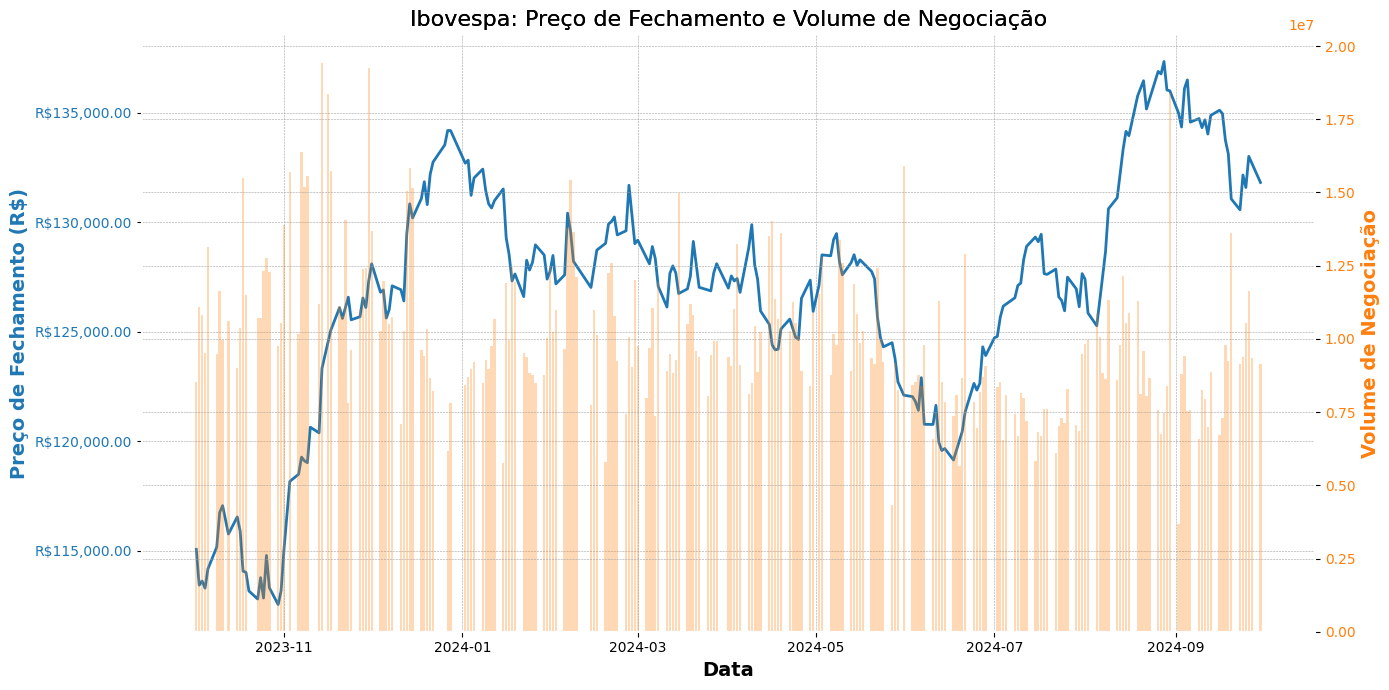

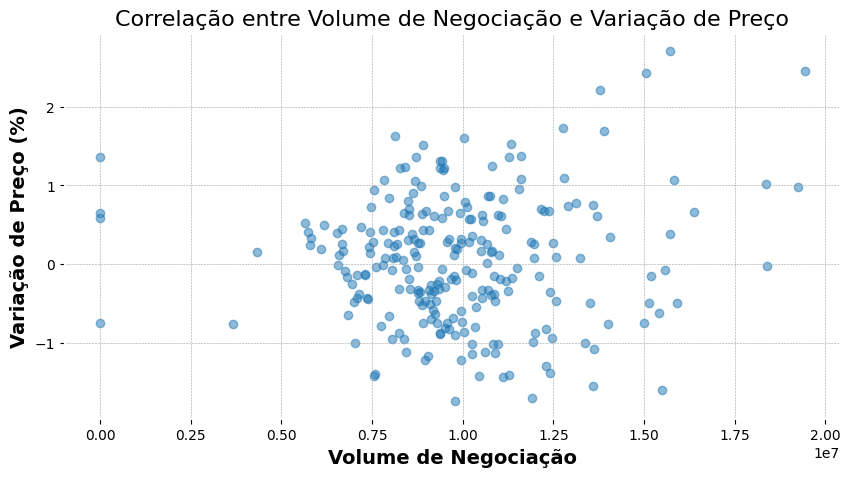

In [42]:
# Definindo o ticker do Ibovespa e o período de análise (últimos 6 meses)
ticker = "^BVSP"  # Ticker do Ibovespa
start_date = "2023-10-01"  # Data de início (seis meses atrás)
end_date = "2024-10-01"    # Data de fim

# Coletando os dados do Ibovespa
ibovespa_data = yf.download(ticker, start=start_date, end=end_date)

# Calculando a variação percentual do preço
ibovespa_data['Price Change (%)'] = ibovespa_data['Close'].pct_change() * 100

# Criando gráficos
fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico de preços
ax1.set_title('Ibovespa: Preço de Fechamento e Volume de Negociação', fontsize=16)
ax1.set_xlabel('Data', fontsize=14)
ax1.set_ylabel('Preço de Fechamento (R$)', fontsize=14, color='tab:blue')
ax1.plot(ibovespa_data.index, ibovespa_data['Close'], label='Preço de Fechamento', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Personalizando o eixo Y para exibir Reais (R$)
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('R${x:,.2f}'))

# Criando um segundo eixo y para o volume
ax2 = ax1.twinx()
ax2.set_ylabel('Volume de Negociação', fontsize=14, color='tab:orange')
ax2.bar(ibovespa_data.index, ibovespa_data['Volume'], label='Volume de Negociação', color='tab:orange', alpha=0.3)
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Exibindo a legenda
fig.tight_layout()  # Ajusta o layout
plt.title('Ibovespa: Preço de Fechamento e Volume de Negociação', fontsize=16)
plt.show()

# Gráfico de correlação entre volume e variação de preço
plt.figure(figsize=(10, 5))
plt.scatter(ibovespa_data['Volume'], ibovespa_data['Price Change (%)'], alpha=0.5)
plt.title('Correlação entre Volume de Negociação e Variação de Preço', fontsize=16)
plt.xlabel('Volume de Negociação', fontsize=14)
plt.ylabel('Variação de Preço (%)', fontsize=14)
plt.show()


[*********************100%***********************]  1 of 1 completed


Correlação entre Volume e variação de preço:
                Volume  Price_Change
Volume        1.000000      0.071146
Price_Change  0.071146      1.000000


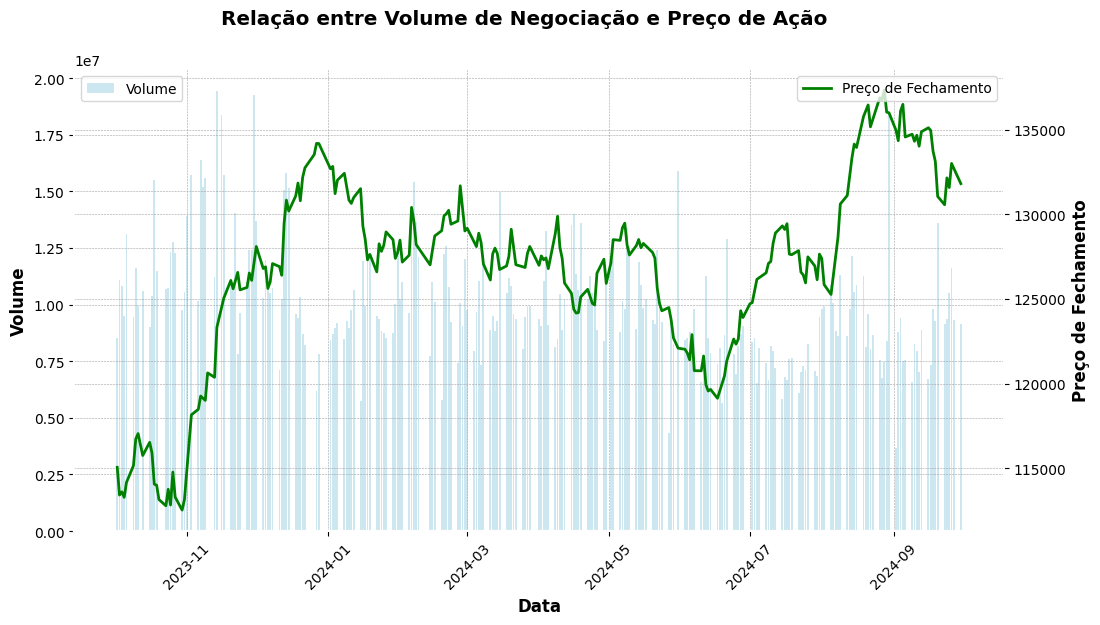

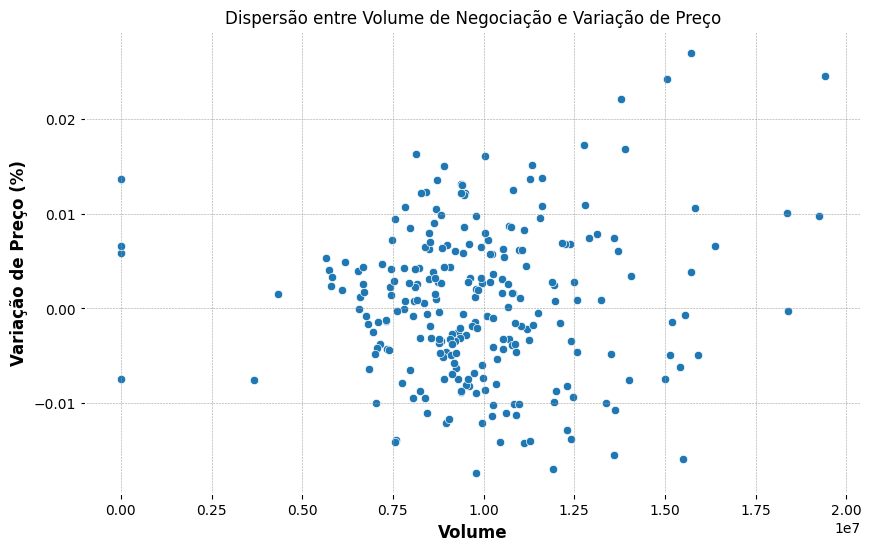

In [ ]:
#Outra forma
# Definindo o ticker e o período
ticker = '^BVSP'
start_date = '2023-10-01'
end_date = '2024-10-01'

# Coletando os dados usando o yfinance
df = yf.download(ticker, start=start_date, end=end_date)

# Adicionando uma coluna 'date' com os índices do DataFrame
df['date'] = df.index

# Passo 1: Calcular a variação de preço diária
df['Price_Change'] = df['Close'].pct_change()

# Passo 2: Analisar a correlação entre o volume e a variação de preço
correlation = df[['Volume', 'Price_Change']].corr()

print("Correlação entre Volume e variação de preço:")
print(correlation)

# Passo 3: Plotar gráficos para identificar padrões

# Passo 3: Plotar gráficos para identificar padrões
fig, ax1 = plt.subplots(figsize=(12, 6))

# Gráfico de Volume
ax1.bar(df['date'], df['Volume'], color='lightblue', alpha=0.6, label='Volume')
ax1.set_xlabel('Data')
ax1.set_ylabel('Volume')
ax1.tick_params(axis='x', rotation=45)

# Criar um segundo eixo para o preço
ax2 = ax1.twinx()
ax2.plot(df['date'], df['Close'], color='green', label='Preço de Fechamento')
ax2.set_ylabel('Preço de Fechamento')

fig.suptitle('Relação entre Volume de Negociação e Preço de Ação')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# Passo 4: Análise da distribuição e relação com gráficos de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Volume', y='Price_Change', data=df)
plt.title('Dispersão entre Volume de Negociação e Variação de Preço')
plt.xlabel('Volume')
plt.ylabel('Variação de Preço (%)')
plt.show()

[*********************100%***********************]  1 of 1 completed


                    Volume  Price Change (%)
Volume            1.000000          0.003343
Price Change (%)  0.003343          1.000000


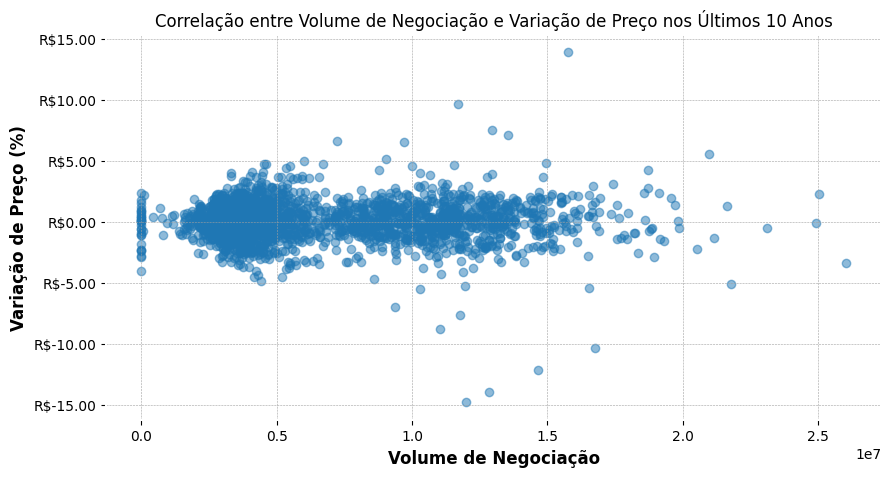

In [43]:
# Definindo o ticker do Ibovespa e o período de análise (últimos 10 anos)
ticker = "^BVSP"
start_date = "2013-10-01"
end_date = "2023-10-01"

# Coletando os dados do Ibovespa
ibovespa_data = yf.download(ticker, start=start_date, end=end_date)

# Calculando a variação percentual do preço
ibovespa_data['Price Change (%)'] = ibovespa_data['Close'].pct_change() * 100

# Calculando a correlação entre volume e variação de preço
correlation = ibovespa_data[['Volume', 'Price Change (%)']].corr()
print(correlation)

# Plotando a correlação
plt.figure(figsize=(10, 5))
plt.scatter(ibovespa_data['Volume'], ibovespa_data['Price Change (%)'], alpha=0.5)

# Personalizando o eixo Y para exibir Reais (R$)
ax = plt.gca()
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('R${x:,.2f}'))

plt.title('Correlação entre Volume de Negociação e Variação de Preço nos Últimos 10 Anos')
plt.xlabel('Volume de Negociação')
plt.ylabel('Variação de Preço (%)')
plt.show()


In [44]:
#Criar arquivo csv com dados baixados
#dados.to_csv('dados.csv', index=True)
dados.to_csv('dados_pojeto_reprograma.csv', index=True, sep=',')

#salva csv no drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
